# Objective::

# We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# Data Description::

In [1]:
# here 8 columns is predictor variables and one target variable.

# importing libraries

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import models, layers, optimizers, utils
from keras.optimizers import Adam


Using TensorFlow backend.


# Loading_dataset....

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# check if any null value is present?
data.isnull().values.any()

False

# Visulazing Outcome

In [10]:
a = data.Outcome.value_counts()

In [11]:
a # here "1" represent diabetic patients.
  # "0" represent non_diabetic patients.

0    500
1    268
Name: Outcome, dtype: int64

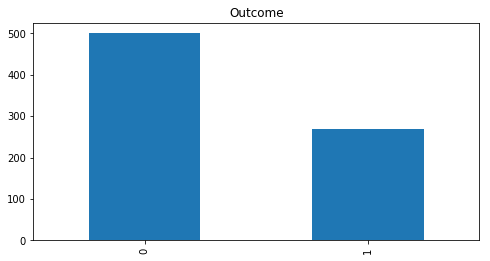

In [12]:
plt.figure(figsize=(8, 4))
a.plot(kind="bar",title ="Outcome")

# Train_Test_Split

In [13]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values


In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
Y[:100]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [17]:
X_train.shape

(537, 8)

In [18]:
X_test.shape

(231, 8)

# Check how many other missing(zero) values


In [19]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['Glucose'] == 0])))
#print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [20]:
#from sklearn.preprocessing import Imputer

#fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

#X_train = fill_values.fit_transform(X_train)
#X_test = fill_values.fit_transform(X_test)

# Building model

In [26]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(50, activation='relu', input_shape=(X.shape[1],)))
  model.add(layers.Dense(40, activation='sigmoid'))
  model.add(layers.Dense(1))
# compile step
  model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
  
  return model

In [27]:
model = build_model()

# Training the network

In [28]:
network = model.fit(X_train, Y_train, epochs=600, batch_size=120)

Epoch 1/600
537/537 [==============================] - 0s 468us/sample - loss: 1.5367 - acc: 0.5568
Epoch 2/600
537/537 [==============================] - 0s 66us/sample - loss: 1.2023 - acc: 0.5866
Epoch 3/600
537/537 [==============================] - 0s 66us/sample - loss: 0.9534 - acc: 0.6406
Epoch 4/600
537/537 [==============================] - 0s 40us/sample - loss: 0.7763 - acc: 0.6480
Epoch 5/600
537/537 [==============================] - 0s 46us/sample - loss: 0.7210 - acc: 0.6201
Epoch 6/600
537/537 [==============================] - 0s 30us/sample - loss: 0.7575 - acc: 0.6685
Epoch 7/600
537/537 [==============================] - 0s 54us/sample - loss: 0.6613 - acc: 0.6425
Epoch 8/600
537/537 [==============================] - 0s 52us/sample - loss: 0.6260 - acc: 0.6629
Epoch 9/600
537/537 [==============================] - 0s 51us/sample - loss: 0.6099 - acc: 0.6499
Epoch 10/600
537/537 [==============================] - 0s 48us/sample - loss: 0.6163 - acc: 0.6574
Epoch 11

Epoch 83/600
537/537 [==============================] - 0s 56us/sample - loss: 0.4732 - acc: 0.7523
Epoch 84/600
537/537 [==============================] - 0s 33us/sample - loss: 0.4972 - acc: 0.7281
Epoch 85/600
537/537 [==============================] - 0s 24us/sample - loss: 0.5066 - acc: 0.7486
Epoch 86/600
537/537 [==============================] - 0s 24us/sample - loss: 0.4817 - acc: 0.7374
Epoch 87/600
537/537 [==============================] - 0s 28us/sample - loss: 0.4919 - acc: 0.7356
Epoch 88/600
537/537 [==============================] - 0s 37us/sample - loss: 0.5367 - acc: 0.7281
Epoch 89/600
537/537 [==============================] - 0s 26us/sample - loss: 0.4788 - acc: 0.7412
Epoch 90/600
537/537 [==============================] - 0s 24us/sample - loss: 0.4730 - acc: 0.7486
Epoch 91/600
537/537 [==============================] - 0s 24us/sample - loss: 0.4659 - acc: 0.7523
Epoch 92/600
537/537 [==============================] - 0s 30us/sample - loss: 0.4670 - acc: 0.7486


537/537 [==============================] - 0s 32us/sample - loss: 0.4744 - acc: 0.7598
Epoch 165/600
537/537 [==============================] - 0s 33us/sample - loss: 0.4365 - acc: 0.7728
Epoch 166/600
537/537 [==============================] - 0s 30us/sample - loss: 0.4800 - acc: 0.7635
Epoch 167/600
537/537 [==============================] - 0s 26us/sample - loss: 0.4524 - acc: 0.7672
Epoch 168/600
537/537 [==============================] - 0s 43us/sample - loss: 0.4497 - acc: 0.7523
Epoch 169/600
537/537 [==============================] - 0s 33us/sample - loss: 0.4409 - acc: 0.7635
Epoch 170/600
537/537 [==============================] - 0s 40us/sample - loss: 0.4591 - acc: 0.7523
Epoch 171/600
537/537 [==============================] - 0s 84us/sample - loss: 0.4714 - acc: 0.7579
Epoch 172/600
537/537 [==============================] - 0s 58us/sample - loss: 0.4406 - acc: 0.7840
Epoch 173/600
537/537 [==============================] - 0s 89us/sample - loss: 0.4609 - acc: 0.7747
Epoc

537/537 [==============================] - 0s 128us/sample - loss: 0.4155 - acc: 0.7896
Epoch 246/600
537/537 [==============================] - 0s 34us/sample - loss: 0.4244 - acc: 0.7858
Epoch 247/600
537/537 [==============================] - 0s 33us/sample - loss: 0.4118 - acc: 0.7858
Epoch 248/600
537/537 [==============================] - 0s 36us/sample - loss: 0.4198 - acc: 0.7765
Epoch 249/600
537/537 [==============================] - 0s 36us/sample - loss: 0.5287 - acc: 0.7225
Epoch 250/600
537/537 [==============================] - 0s 32us/sample - loss: 0.4556 - acc: 0.7747
Epoch 251/600
537/537 [==============================] - 0s 32us/sample - loss: 0.4404 - acc: 0.7840
Epoch 252/600
537/537 [==============================] - 0s 27us/sample - loss: 0.4409 - acc: 0.7858
Epoch 253/600
537/537 [==============================] - 0s 28us/sample - loss: 0.4203 - acc: 0.7896
Epoch 254/600
537/537 [==============================] - 0s 59us/sample - loss: 0.4157 - acc: 0.7765
Epo

537/537 [==============================] - 0s 24us/sample - loss: 0.4431 - acc: 0.7672
Epoch 326/600
537/537 [==============================] - 0s 24us/sample - loss: 0.4712 - acc: 0.7914
Epoch 327/600
537/537 [==============================] - 0s 26us/sample - loss: 0.4085 - acc: 0.7914
Epoch 328/600
537/537 [==============================] - 0s 26us/sample - loss: 0.4045 - acc: 0.7970
Epoch 329/600
537/537 [==============================] - 0s 26us/sample - loss: 0.4186 - acc: 0.7952
Epoch 330/600
537/537 [==============================] - 0s 32us/sample - loss: 0.4033 - acc: 0.7896
Epoch 331/600
537/537 [==============================] - 0s 24us/sample - loss: 0.4456 - acc: 0.7784
Epoch 332/600
537/537 [==============================] - 0s 28us/sample - loss: 0.3950 - acc: 0.7989
Epoch 333/600
537/537 [==============================] - 0s 24us/sample - loss: 0.4070 - acc: 0.8119
Epoch 334/600
537/537 [==============================] - 0s 28us/sample - loss: 0.4036 - acc: 0.8026
Epoc

537/537 [==============================] - 0s 81us/sample - loss: 0.3895 - acc: 0.8119
Epoch 405/600
537/537 [==============================] - 0s 38us/sample - loss: 0.3921 - acc: 0.8007
Epoch 406/600
537/537 [==============================] - 0s 71us/sample - loss: 0.3756 - acc: 0.8026
Epoch 407/600
537/537 [==============================] - 0s 92us/sample - loss: 0.3909 - acc: 0.7952
Epoch 408/600
537/537 [==============================] - 0s 64us/sample - loss: 0.3998 - acc: 0.7970
Epoch 409/600
537/537 [==============================] - 0s 50us/sample - loss: 0.3975 - acc: 0.7952
Epoch 410/600
537/537 [==============================] - 0s 95us/sample - loss: 0.3798 - acc: 0.8138
Epoch 411/600
537/537 [==============================] - 0s 78us/sample - loss: 0.3691 - acc: 0.8045
Epoch 412/600
537/537 [==============================] - 0s 43us/sample - loss: 0.3996 - acc: 0.8045
Epoch 413/600
537/537 [==============================] - 0s 83us/sample - loss: 0.4240 - acc: 0.7933
Epoc

537/537 [==============================] - 0s 28us/sample - loss: 0.3727 - acc: 0.8250
Epoch 485/600
537/537 [==============================] - 0s 31us/sample - loss: 0.4425 - acc: 0.8045
Epoch 486/600
537/537 [==============================] - 0s 30us/sample - loss: 0.3720 - acc: 0.8212
Epoch 487/600
537/537 [==============================] - 0s 24us/sample - loss: 0.3668 - acc: 0.8138
Epoch 488/600
537/537 [==============================] - 0s 24us/sample - loss: 0.3758 - acc: 0.8250
Epoch 489/600
537/537 [==============================] - 0s 26us/sample - loss: 0.4098 - acc: 0.8119
Epoch 490/600
537/537 [==============================] - 0s 42us/sample - loss: 0.4494 - acc: 0.7877
Epoch 491/600
537/537 [==============================] - 0s 52us/sample - loss: 0.3665 - acc: 0.8212
Epoch 492/600
537/537 [==============================] - 0s 112us/sample - loss: 0.3601 - acc: 0.8268
Epoch 493/600
537/537 [==============================] - 0s 48us/sample - loss: 0.4469 - acc: 0.7840
Epo

537/537 [==============================] - 0s 47us/sample - loss: 0.4038 - acc: 0.8212
Epoch 566/600
537/537 [==============================] - 0s 37us/sample - loss: 0.3514 - acc: 0.8250
Epoch 567/600
537/537 [==============================] - 0s 41us/sample - loss: 0.4279 - acc: 0.8007
Epoch 568/600
537/537 [==============================] - 0s 56us/sample - loss: 0.3639 - acc: 0.8194
Epoch 569/600
537/537 [==============================] - 0s 45us/sample - loss: 0.3462 - acc: 0.8287
Epoch 570/600
537/537 [==============================] - 0s 39us/sample - loss: 0.3582 - acc: 0.8231
Epoch 571/600
537/537 [==============================] - 0s 44us/sample - loss: 0.3495 - acc: 0.8250
Epoch 572/600
537/537 [==============================] - 0s 45us/sample - loss: 0.4573 - acc: 0.8212
Epoch 573/600
537/537 [==============================] - 0s 46us/sample - loss: 0.3492 - acc: 0.8250
Epoch 574/600
537/537 [==============================] - 0s 37us/sample - loss: 0.3428 - acc: 0.8361
Epoc

In [24]:
#history = model_1.fit(X_train,Y_train,epochs=100, test_data =(X_test, Y_test))


# Evaluating the network

In [29]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print("test_acc::"=test_acc)

231/231 [==============================] - 0s 371us/sample - loss: 1.2817 - acc: 0.7143


[1.2816786611234987, 0.71428573]

# Saving our model

In [30]:
model.save('diabetes.h5')

In [31]:
##model.load_weights('diabetes.h5')